<h1 style="text-align:center; font-family:Didot;">XGBoost for time series forecasting</h1>

In [23]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [24]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

In [25]:
data = pd.read_csv("final_data.csv")
pol = data[data['Country'] == "Poland"]
x = pol["AverageTemperature"].to_numpy()

In [26]:
class XGBoost:
    
    def __init__(self, data, horizon, n_estimators=1000):
        self.data = data
        self.n = len(data)
        self.horizon = horizon
        self.number_of_estimators = n_estimators
        self.model = xgb.XGBRegressor(n_estimators=n_estimators)
        self.to_predict = self.create_predict(self.data)
        self.training = self.create_training(self.to_predict)
    
    def create_predict(self, data):
        k = self.n - self.horizon
        X = np.zeros((k, self.horizon+1))
        for i in range(k-1):
            new_x = self.data[i:i+self.horizon]
            new_y = self.data[i+self.horizon+1]
            X[i, :] = np.concatenate([new_x, [new_y]])
        return X
    
    @staticmethod
    def create_training(data):
        new = deepcopy(data)
        np.random.shuffle(new)
        return new        
        
    def train(self):
        X, y = self.training[:, :-1], self.training[:, -1]
        self.model.fit(X, y)
        
    def predict(self, n_ahead):
        forecasts = np.zeros(n_ahead)
        current = np.array(self.training[-1, :][1:], ndmin=2)
        for i in range(n_ahead):
            pred = self.model.predict(current)
            forecasts[i] = pred
            current = np.array(np.hstack([current[:, 1:], np.array([pred], ndmin=2)]), ndmin=2)
        return forecasts
    
    def predict_in_sample(self):
        pass

In [27]:
t = XGBoost(x, 30)
t.train()
vals = t.predict(100)

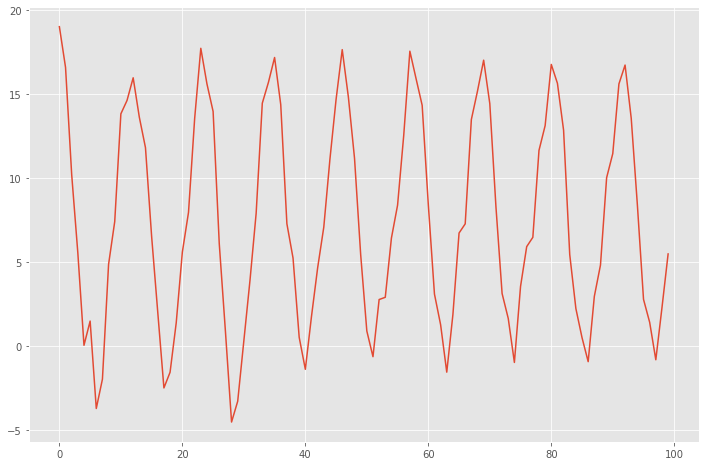

In [28]:
plt.plot(vals)
plt.show()

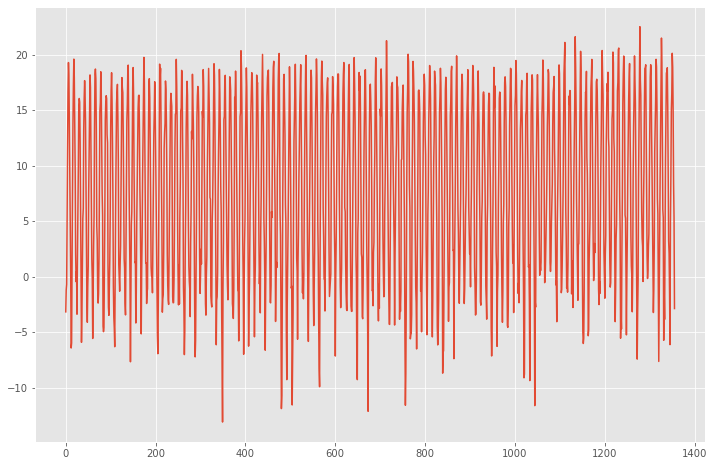

In [12]:
plt.plot(x)